# Exploratory data analisis of RAWG API

#### Libraries used

In [2]:
from collections import Counter
from dotenv import load_dotenv
import pandas as pd
import os
import re
import requests
import seaborn as sns
import time
import json
import ast
import sys
import matplotlib.pyplot as plt

#### Connection to the API

In [3]:
load_dotenv()

Api_Key = os.getenv('API_KEY')
url_base = f"https://api.rawg.io/api/games/"
params = { 'key': Api_Key }

In [10]:
def fetch_data(url):
    try:
        response = requests.get(url)
        print("url request:", response.url)
        print("HTTP status code:", response.status_code)
        
        if response.status_code != 200:
            print("Non-200 status code received.")
            return None
        try:
            return response.json()
        except ValueError:
            print("Error decoding JSON:", response.text)
            return None
    
    except requests.exceptions.RequestException as e:
        print("Request failed:", e)
        return None

all_games = []
slug = 'slug'
current_page = f"{url_base}{slug}?key={Api_Key}"
max_pages = 0

for _ in range(max_pages):
    if not current_page:
        break
    data = fetch_data(current_page)
    if data and 'results' in data:
        all_games.extend(data['results'])
        current_page = data.get('next')
        time.sleep(1)
    else:
        print("No valid data received.")
        break

rawg_games_data = pd.DataFrame(all_games)
print("Total games collected:", len(games_df))


url request: https://api.rawg.io/api/games/slug?key=4d7b714355ba43349b48b1b3d7bbd52a
HTTP status code: 200
No valid data received.
Total games collected: 0


In [28]:
sys.path.append('../data/')
rawg_games_data.to_csv('../data/rawg_games_extended_data604.csv', index=False)

# Explorative Data Analysis

In [11]:
rawg_games_data.head()

NameError: name 'rawg_games_data' is not defined

In [ ]:
rawg_games_data.describe()

,id,rating,rating_top,ratings_count,reviews_text_count,added,metacritic,playtime,suggestions_count,user_game,reviews_count,clip
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,880.000000,1000.00000,1000.000000,0.0,1000.00000,0.0
mean,46437.327000,3.729030,3.993000,892.49200,6.091000,4963.344000,80.072727,6.29600,489.338000,NaN,901.86200,NaN
std,115903.691656,0.530418,0.758635,785.87372,8.362215,2720.794075,8.130152,8.43027,170.550911,NaN,795.62559,NaN
min,25.000000,1.840000,1.000000,67.00000,0.000000,2390.000000,44.000000,0.00000,47.000000,NaN,67.00000,NaN
25%,3931.750000,3.420000,4.000000,378.00000,1.000000,2953.000000,75.000000,2.00000,383.000000,NaN,382.00000,NaN
50%,11447.500000,3.820000,4.000000,640.50000,3.000000,4034.500000,81.000000,4.00000,508.500000,NaN,646.00000,NaN
75%,22508.250000,4.130000,4.000000,1130.00000,8.000000,6129.250000,86.000000,7.00000,606.250000,NaN,1145.25000,NaN
max,906547.000000,4.750000,5.000000,6781.00000,76.000000,20853.000000,97.000000,121.00000,1692.000000,NaN,6883.00000,NaN


In [ ]:
rawg_games_data = rawg_games_data.rename(columns={'name': 'title'})
rawg_games_data.head()

,id,slug,title,released,tba,background_image,rating,rating_top,ratings,ratings_count,...,saturated_color,dominant_color,platforms,parent_platforms,genres,stores,clip,tags,esrb_rating,short_screenshots
0,3498,grand-theft-auto-v,Grand Theft Auto V,2013-09-17,False,https://media.rawg.io/media/games/20a/20aa03a1...,4.47,5,"[{'id': 5, 'title': 'exceptional', 'count': 40...",6781,...,0f0f0f,0f0f0f,"[{'platform': {'id': 4, 'name': 'PC', 'slug': ...","[{'platform': {'id': 1, 'name': 'PC', 'slug': ...","[{'id': 4, 'name': 'Action', 'slug': 'action',...","[{'id': 290375, 'store': {'id': 3, 'name': 'Pl...",NaN,"[{'id': 31, 'name': 'Singleplayer', 'slug': 's...","{'id': 4, 'name': 'Mature', 'slug': 'mature'}","[{'id': -1, 'image': 'https://media.rawg.io/me..."
1,3328,the-witcher-3-wild-hunt,The Witcher 3: Wild Hunt,2015-05-18,False,https://media.rawg.io/media/games/618/618c2031...,4.65,5,"[{'id': 5, 'title': 'exceptional', 'count': 50...",6494,...,0f0f0f,0f0f0f,"[{'platform': {'id': 186, 'name': 'Xbox Series...","[{'platform': {'id': 1, 'name': 'PC', 'slug': ...","[{'id': 4, 'name': 'Action', 'slug': 'action',...","[{'id': 354780, 'store': {'id': 5, 'name': 'GO...",NaN,"[{'id': 31, 'name': 'Singleplayer', 'slug': 's...","{'id': 4, 'name': 'Mature', 'slug': 'mature'}","[{'id': -1, 'image': 'https://media.rawg.io/me..."
2,4200,portal-2,Portal 2,2011-04-18,False,https://media.rawg.io/media/games/2ba/2bac0e87...,4.61,5,"[{'id': 5, 'title': 'exceptional', 'count': 39...",5619,...,0f0f0f,0f0f0f,"[{'platform': {'id': 16, 'name': 'PlayStation ...","[{'platform': {'id': 1, 'name': 'PC', 'slug': ...","[{'id': 2, 'name': 'Shooter', 'slug': 'shooter...","[{'id': 465889, 'store': {'id': 2, 'name': 'Xb...",NaN,"[{'id': 31, 'name': 'Singleplayer', 'slug': 's...","{'id': 2, 'name': 'Everyone 10+', 'slug': 'eve...","[{'id': -1, 'image': 'https://media.rawg.io/me..."
3,4291,counter-strike-global-offensive,Counter-Strike: Global Offensive,2012-08-21,False,https://media.rawg.io/media/games/736/73619bd3...,3.57,4,"[{'id': 4, 'title': 'recommended', 'count': 16...",3448,...,0f0f0f,0f0f0f,"[{'platform': {'id': 4, 'name': 'PC', 'slug': ...","[{'platform': {'id': 1, 'name': 'PC', 'slug': ...","[{'id': 2, 'name': 'Shooter', 'slug': 'shooter...","[{'id': 4619, 'store': {'id': 3, 'name': 'Play...",NaN,"[{'id': 40847, 'name': 'Steam Achievements', '...","{'id': 4, 'name': 'Mature', 'slug': 'mature'}","[{'id': -1, 'image': 'https://media.rawg.io/me..."
4,5286,tomb-raider,Tomb Raider (2013),2013-03-05,False,https://media.rawg.io/media/games/021/021c4e21...,4.05,4,"[{'id': 4, 'title': 'recommended', 'count': 23...",3867,...,0f0f0f,0f0f0f,"[{'platform': {'id': 18, 'name': 'PlayStation ...","[{'platform': {'id': 1, 'name': 'PC', 'slug': ...","[{'id': 4, 'name': 'Action', 'slug': 'action',...","[{'id': 33824, 'store': {'id': 7, 'name': 'Xbo...",NaN,"[{'id': 31, 'name': 'Singleplayer', 'slug': 's...","{'id': 4, 'name': 'Mature', 'slug': 'mature'}","[{'id': -1, 'image': 'https://media.rawg.io/me..."


In [ ]:
# Convertir 'released' a datetime
rawg_games_data['released'] = pd.to_datetime(rawg_games_data['released'], errors='coerce')
rawg_games_data['released']

0     2013-09-17
1     2015-05-18
2     2011-04-18
3     2012-08-21
4     2013-03-05
         ...    
995   2020-11-13
996   2022-03-16
997   2018-10-30
998   2017-12-28
999   2013-11-15
Name: released, Length: 1000, dtype: datetime64[ns]

In [ ]:
# Adjusted function to extract platform names
def extract_classification_names(json_str):
    # Check if the input is actually a string
    if isinstance(json_str, str):
        try:
            # Assuming the JSON strings are formatted with double quotes
            classification_data = json.loads(json_str.replace("'", '"'))
            # If the structure contains a list of platforms, we join them with a comma
            if isinstance(classification_data, list):
                classification_names = [classification['name'] for classification in classification_data]
                return ', '.join(classification_names)
            # If it's a dictionary and 'name' is the key for platform names
            elif 'name' in classification_data:
                return classification_data['name']
            else:
                return None
        except json.JSONDecodeError:
            return None
    else:
        return None

# Apply the function to the 'esrb_rating' column
rawg_games_data['rating'] = rawg_games_data['esrb_rating'].apply(extract_classification_names)

# Check the transformation results
print(rawg_games_data[['title', 'rating']].head())

                              title        rating
0                Grand Theft Auto V        Mature
1          The Witcher 3: Wild Hunt        Mature
2                          Portal 2  Everyone 10+
3  Counter-Strike: Global Offensive        Mature
4                Tomb Raider (2013)        Mature


In [ ]:
def extract_first_genre_name(json_str):
    if isinstance(json_str, str):
        try:
            # Correctly parse the JSON assuming single quotes in string representation
            genre_data = json.loads(json_str.replace("'", '"'))
            # Check if the data structure is a dictionary (single genre) or a list (multiple genres)
            if isinstance(genre_data, dict):
                # Return the name directly if it's a single genre
                return genre_data['name']
            elif isinstance(genre_data, list) and len(genre_data) > 0:
                # Return the name of the first genre if there are multiple
                return genre_data[0]['name']
            else:
                return None
        except json.JSONDecodeError:
            return None
    else:
        return None

# Apply the modified function to the 'genres' column
rawg_games_data['genres'] = rawg_games_data['genres'].apply(extract_first_genre_name)

# Display the result to verify
print(rawg_games_data[['title', 'genres']])

                                  title   genres
0                    Grand Theft Auto V   Action
1              The Witcher 3: Wild Hunt   Action
2                              Portal 2  Shooter
3      Counter-Strike: Global Offensive  Shooter
4                    Tomb Raider (2013)   Action
..                                  ...      ...
995    Call of Duty: Black Ops Cold War   Action
996                               Tunic   Action
997                     Call of Cthulhu   Action
998              SCP: Secret Laboratory   Action
999  Baldur's Gate II: Enhanced Edition      RPG

[1000 rows x 2 columns]


In [ ]:
def preprocess_json_string(json_str):
    # Escape newline characters
    json_str = json_str.replace('\n', '\\n')
    
    # Remove HTML tags
    json_str = re.sub(r'<[^>]*>', '', json_str)
    
    # Replace other escape sequences with their corresponding characters
    json_str = json_str.replace('\\r\\n', '\\n').replace('\\t', '\\t').replace('\\xa0', ' ')
    
    return json_str
def extract_platform_names_clean(platforms_str):
    try:
        # Preprocess the input string
        platforms_str = preprocess_json_string(platforms_str)
        
        # Attempt to remove or escape HTML content and other problematic text
        cleaned_str = re.sub(r'(<.*?>)', '', platforms_str)  # Attempt to remove all HTML tags
        cleaned_str = re.sub(r'"requirements_en": \{.*?\},', '', cleaned_str)  # Remove complex JSON structures within strings

        # Convert the cleaned string from single quotes to valid JSON format
        formatted_str = cleaned_str.replace("'", '"').replace('None', 'null').replace('\r\n', ' ').replace('\n', ' ')

        # Load the string as JSON
        platforms_data = json.loads(formatted_str)
        
        # Extract platform names
        platform_names = [platform['platform']['name'] for platform in platforms_data]
        return platform_names
    except json.JSONDecodeError as e:
        print(f"JSON Decode Error: {e} - {platforms_str}")
        return []
    except KeyError as e:
        print(f"Key Error: {e} - {platforms_str}")
        return []
    except Exception as e:
        print(f"Unexpected Error: {e} - {platforms_str}")
        return []

# Apply the function to each row of the DataFrame's 'platforms' column
rawg_games_data['platforms'] = rawg_games_data['platforms'].apply(extract_platform_names_clean)

JSON Decode Error: Expecting ',' delimiter: line 1 column 3521 (char 3520) - [{'platform': {'id': 4, 'name': 'PC', 'slug': 'pc', 'image': None, 'year_end': None, 'year_start': None, 'games_count': 528349, 'image_background': 'https://media.rawg.io/media/games/120/1201a40e4364557b124392ee50317b99.jpg'}, 'released_at': '2010-09-21', 'requirements_en': {'minimum': 'Minimum:\t\t\t\t\tOS: Windows® Vista SP2/ Windows® 7 \t\t\t\t\t\tProcessor: Intel Core 2 Duo 1.8 GHz or AMD Athlon X2 64 2.0 GHz\t\t\t\t\t\tMemory: 2GB RAM \t\t\t\t\t\tGraphics:256 MB ATI HD2600 XT or better, 256 MB nVidia 7900 GS or better, or Core i3 or better integrated graphics \t\t\t\t\t\tDirectX®: DirectX® version 9.0c \t\t\t\t\t\tHard Drive: 8 GB Free \t\t\t\t\t\tSound: DirectX 9.0c-compatible sound card \t\t\t\t\t\tNote: Optimized for the touch-screen Ultrabook™ device\t\t\t\t\t', 'recommended': 'Recommended:\t\t\t\t\tOS: Windows® Vista SP2/ Windows® 7 \t\t\t\t\t\tProcessor: 1.8 GHz Quad Core CPU \t\t\t\t\t\tMemory: 4 G

In [ ]:
print(rawg_games_data[['title', 'platforms']].head())

                              title  \
0                Grand Theft Auto V   
1          The Witcher 3: Wild Hunt   
2                          Portal 2   
3  Counter-Strike: Global Offensive   
4                Tomb Raider (2013)   

                                           platforms  
0  [PC, PlayStation 5, Xbox Series S/X, PlayStati...  
1  [Xbox Series S/X, PlayStation 5, macOS, PlaySt...  
2  [PlayStation 3, PC, Xbox 360, Linux, macOS, Xb...  
3               [PC, Linux, Xbox 360, PlayStation 3]  
4  [PlayStation 4, macOS, PC, Xbox One, Xbox 360,...  


In [ ]:
def get_first_component(arr):
    if isinstance(arr, list) and len(arr) > 0:
        return arr[0]
    else:
        return None

# Apply the function to the 'platforms' column and overwrite the values in the same column
rawg_games_data['platforms'] = rawg_games_data['platforms'].apply(get_first_component)

In [ ]:
rawg_games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  1000 non-null   int64         
 1   slug                1000 non-null   object        
 2   title               1000 non-null   object        
 3   released            1000 non-null   datetime64[ns]
 4   tba                 1000 non-null   bool          
 5   background_image    1000 non-null   object        
 6   rating              737 non-null    object        
 7   rating_top          1000 non-null   int64         
 8   ratings             1000 non-null   object        
 9   ratings_count       1000 non-null   int64         
 10  reviews_text_count  1000 non-null   int64         
 11  added               1000 non-null   int64         
 12  added_by_status     1000 non-null   object        
 13  metacritic          880 non-null    float64      

In [ ]:
columns_to_drop = ['id', 'tags', 'ratings', 'esrb_rating', 'stores', 'slug', 'tba', 'background_image', 'rating_top', 'reviews_text_count', 'added', 'added_by_status', 'parent_platforms', 'clip', 'short_screenshots', 'playtime', 'suggestions_count', 'user_game', 'metacritic', 'updated', 'reviews_count', 'saturated_color', 'dominant_color']
rawg_games_data = rawg_games_data.drop(columns_to_drop, axis=1)

In [ ]:
rawg_games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   title          1000 non-null   object        
 1   released       1000 non-null   datetime64[ns]
 2   rating         737 non-null    object        
 3   ratings_count  1000 non-null   int64         
 4   platforms      996 non-null    object        
 5   genres         999 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 47.0+ KB


In [ ]:
rawg_games_data = rawg_games_data.applymap(lambda x: x.upper() if isinstance(x, str) else x)

C:\Users\dayan\AppData\Local\Temp\ipykernel_17572\1865406707.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  rawg_games_data = rawg_games_data.applymap(lambda x: x.upper() if isinstance(x, str) else x)


In [ ]:
rawg_games_data.to_csv('../data/rawg_data.csv', index=False)
rawg_games_data.head()

,title,released,rating,ratings_count,platforms,genres
0,GRAND THEFT AUTO V,2013-09-17,MATURE,6781,PC,ACTION
1,THE WITCHER 3: WILD HUNT,2015-05-18,MATURE,6494,XBOX SERIES S/X,ACTION
2,PORTAL 2,2011-04-18,EVERYONE 10+,5619,PLAYSTATION 3,SHOOTER
3,COUNTER-STRIKE: GLOBAL OFFENSIVE,2012-08-21,MATURE,3448,PC,SHOOTER
4,TOMB RAIDER (2013),2013-03-05,MATURE,3867,PLAYSTATION 4,ACTION


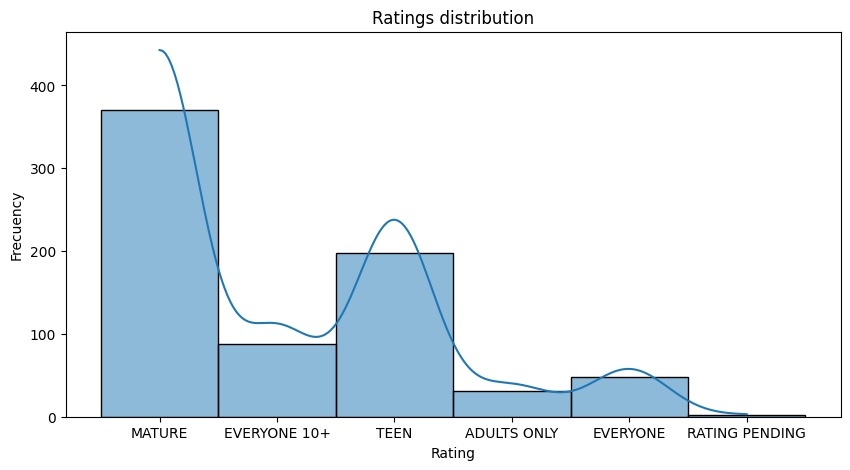

In [ ]:
# 'rating' distribution
plt.figure(figsize=(10, 5))
sns.histplot(rawg_games_data['rating'], kde=True)
plt.title('Ratings distribution')
plt.xlabel('Rating')
plt.ylabel('Frecuency')
plt.show()

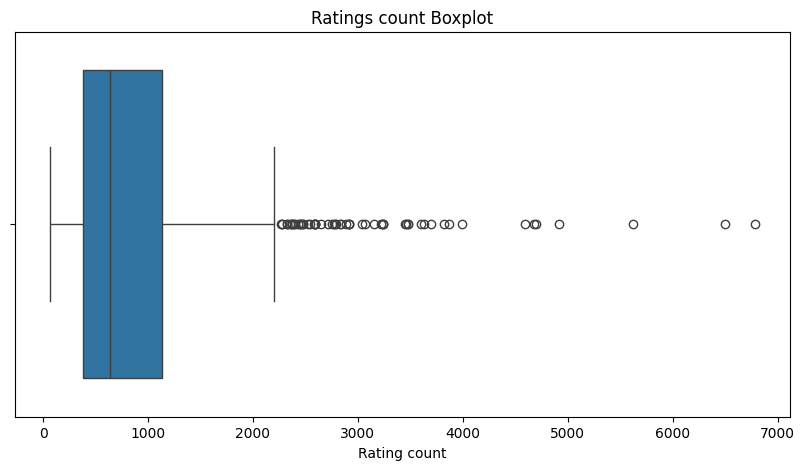

In [ ]:
# 'ratings_count' atipics values Boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(x=rawg_games_data['ratings_count'])
plt.title('Ratings count Boxplot')
plt.xlabel('Rating count')
plt.show()

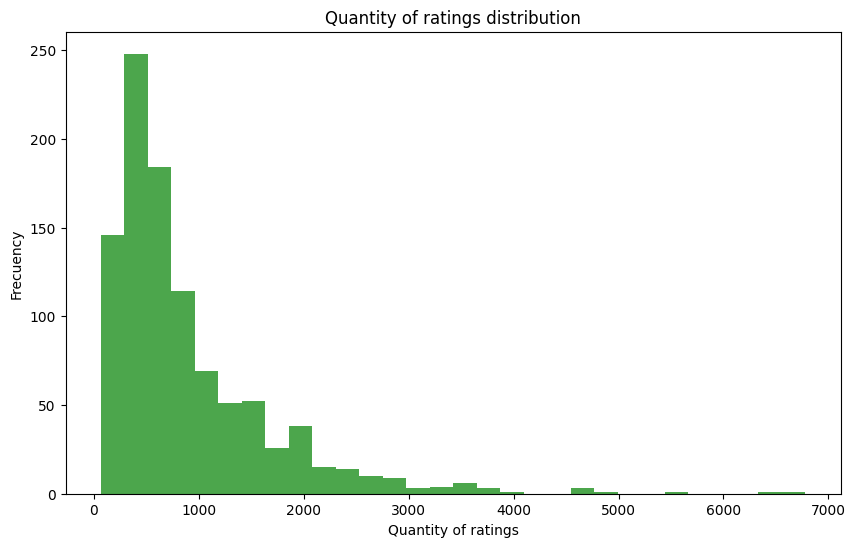

In [ ]:
# Quantity of ratings distribution
plt.figure(figsize=(10, 6))
plt.hist(rawg_games_data['ratings_count'].dropna(), bins=30, color='green', alpha=0.7)
plt.title('Quantity of ratings distribution')
plt.xlabel('Quantity of ratings')
plt.ylabel('Frecuency')
plt.show()

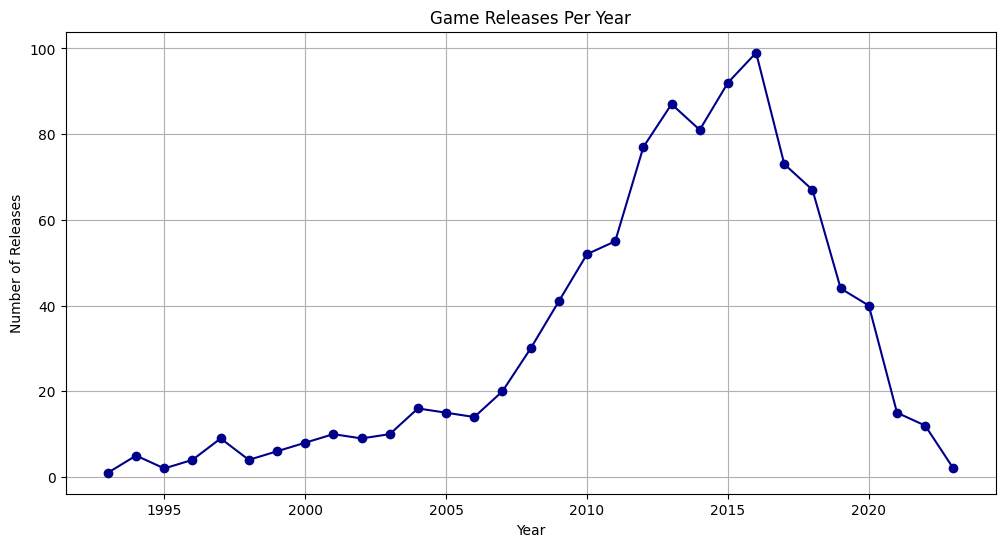

In [ ]:
# Create a new column for the year
rawg_games_data['release_year'] = rawg_games_data['released'].dt.year

# Count releases per year
releases_per_year = rawg_games_data['release_year'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(12, 6))
releases_per_year.plot(kind='line', marker='o', linestyle='-', color='darkblue')
plt.title('Game Releases Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.grid(True)
plt.show()

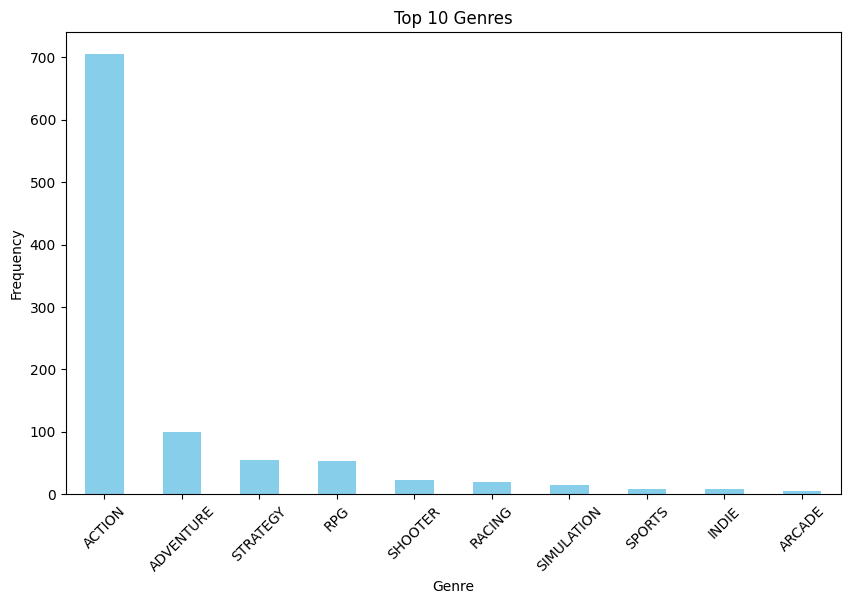

In [ ]:
genre_counts = rawg_games_data['genres'].value_counts().head(10)

plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Genres')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

<Figure size 1400x700 with 0 Axes>

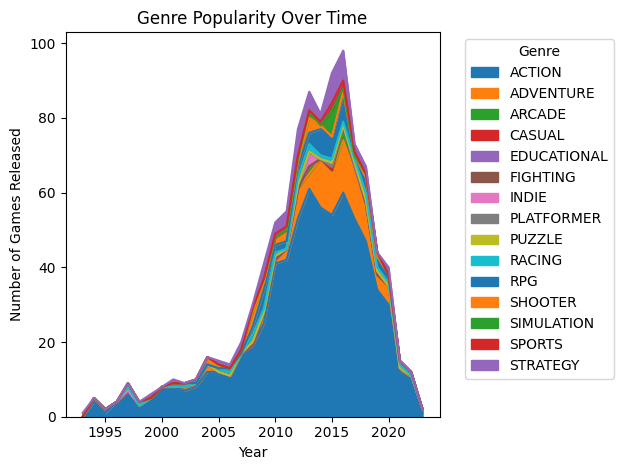

In [ ]:
# Group by release year and genre, count occurrences
genre_popularity = rawg_games_data.groupby(['release_year', 'genres']).size().unstack().fillna(0)

# Plotting with stacked area chart for trend analysis
plt.figure(figsize=(14, 7))
genre_popularity.plot(kind='area', stacked=True)
plt.title('Genre Popularity Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Games Released')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

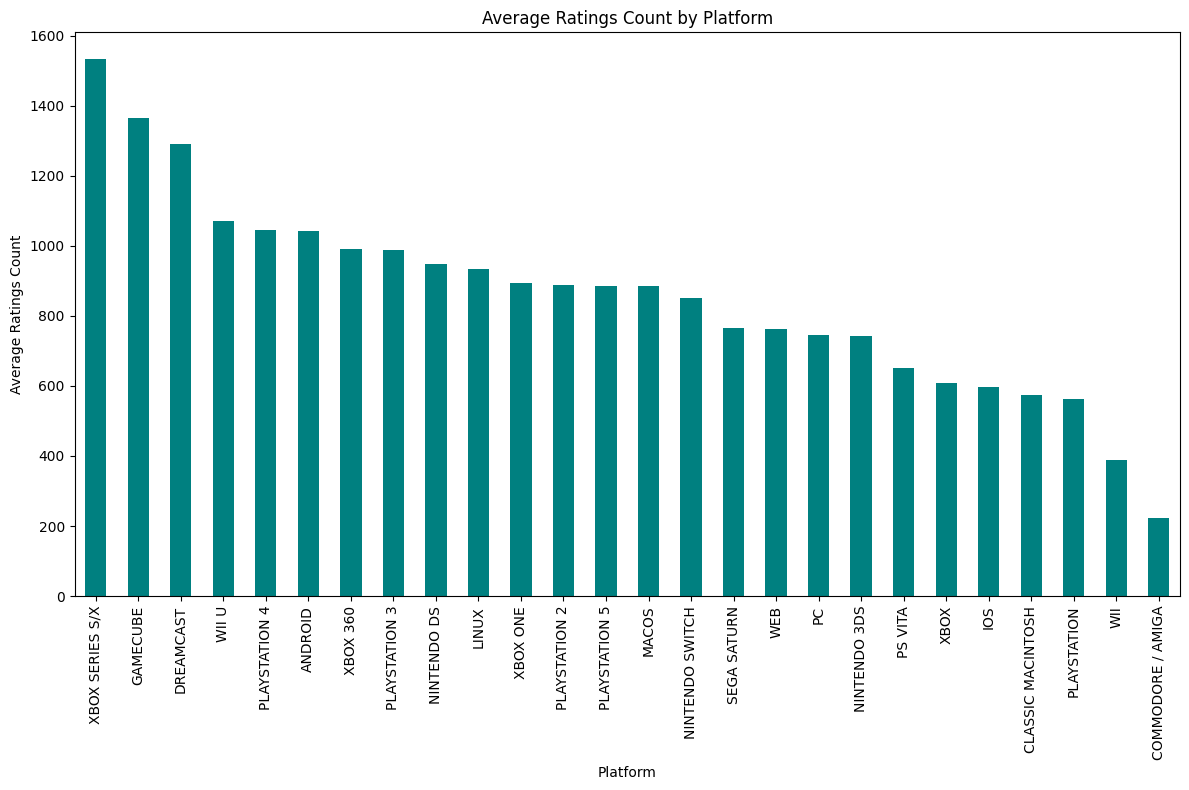

In [ ]:
platform_average_ratings = rawg_games_data.groupby('platforms')['ratings_count'].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
platform_average_ratings.plot(kind='bar', color='teal')
plt.title('Average Ratings Count by Platform')
plt.xlabel('Platform')
plt.ylabel('Average Ratings Count')
plt.xticks(rotation=90)
plt.tight_layout() 
plt.show()